In [97]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 1. Import Dataset


In [2]:
df = pd.read_csv('ObesityDataSet.csv', encoding='latin-1')

### 2 Exploration Dataset

In [3]:
# Preview of the dataset
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [4]:
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

##### Indice de masse corporelle= Weight/(Height*Height)


    • Insuffisance pondérale inférieure à 18,5

    • Normal 18,5 à 24,9

    • Surpoids 25,0 à 29,9

    • Obésité I 30,0 à 34,9

    • Obésité II 35,0 à 39,9

    • Obésité III supérieure à 40

In [5]:
# Add IMC column
df['IMC'] = df['Weight']/(df['Height']*df['Height'])

In [6]:
# Shape of the dataset 
df.shape

(2111, 18)

In [7]:
# Columns of the dataset 
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'IMC'],
      dtype='object')

In [8]:
# Types of the features
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
IMC                               float64
dtype: object

In [9]:
# Number of NA per columns
df.isna().sum().sort_values(ascending=True)

Gender                            0
MTRANS                            0
CALC                              0
TUE                               0
FAF                               0
SCC                               0
CH2O                              0
SMOKE                             0
CAEC                              0
NCP                               0
FCVC                              0
FAVC                              0
family_history_with_overweight    0
Weight                            0
Height                            0
Age                               0
NObeyesdad                        0
IMC                               0
dtype: int64

#####  We can see that we don't have NA values

Our dataset is therefore already cleaned up because neither column of the two datasets contains undetermined values.

In [10]:
temp=dict(zip(df["Gender"].unique(),["1","2"]))
df["Gender"].replace(temp,inplace=True)
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0      1  21.0    1.62    64.0                            yes   no   2.0  3.0   
1      1  21.0    1.52    56.0                            yes   no   3.0  3.0   
2      2  23.0    1.80    77.0                            yes   no   2.0  3.0   
3      2  27.0    1.80    87.0                             no   no   3.0  3.0   
4      2  22.0    1.78    89.8                             no   no   2.0  1.0   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no   2.0   no  0.0  1.0          no  Public_Transportation   
1  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2  Sometimes    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3  Sometimes    no   2.0   no  2.0  0.0  Frequently                Walking   
4  Sometimes    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

            NObeyesdad        IMC  
0        Normal_Weight  24.386526  
1        Normal_Weight  24.238227  
2        Normal_Weight  23.765432  
3   Overweight_Level_I  26.851852  
4  Overweight_Level_II  28.342381

#### Replace qualitative features by numerical values

In [11]:
temp=dict(zip(df["family_history_with_overweight"].unique(),range(2)))
df["family_history_with_overweight"].replace(temp,inplace=True)

In [12]:
temp=dict(zip(df["FAVC"].unique(),range(2)))
df["FAVC"].replace(temp,inplace=True)

In [13]:
temp=dict(zip(df["CAEC"].unique(),range(4)))
df["CAEC"].replace(temp,inplace=True)

In [14]:
temp=dict(zip(df["SMOKE"].unique(),range(2)))
df["SMOKE"].replace(temp,inplace=True)

In [15]:
temp=dict(zip(df["SCC"].unique(),range(2)))
df["SCC"].replace(temp,inplace=True)

In [16]:
temp=dict(zip(df["CALC"].unique(),range(4)))
df["CALC"].replace(temp,inplace=True)

In [17]:
temp=dict(zip(df["MTRANS"].unique(),range(5)))
df["MTRANS"].replace(temp,inplace=True)

In [18]:
temp=dict(zip(df["NObeyesdad"].unique(), range(7)))
df["NObeyesdad"].replace(temp, inplace=True)

### 3. Data Visualization 

In [19]:
df_copy=df.copy()
target = 'NObeyesdad'
features_list = list(df_copy.columns)
features_list.remove(target)

Text(0.65, 1.25, 'NObeyesdad Univariate Plots')

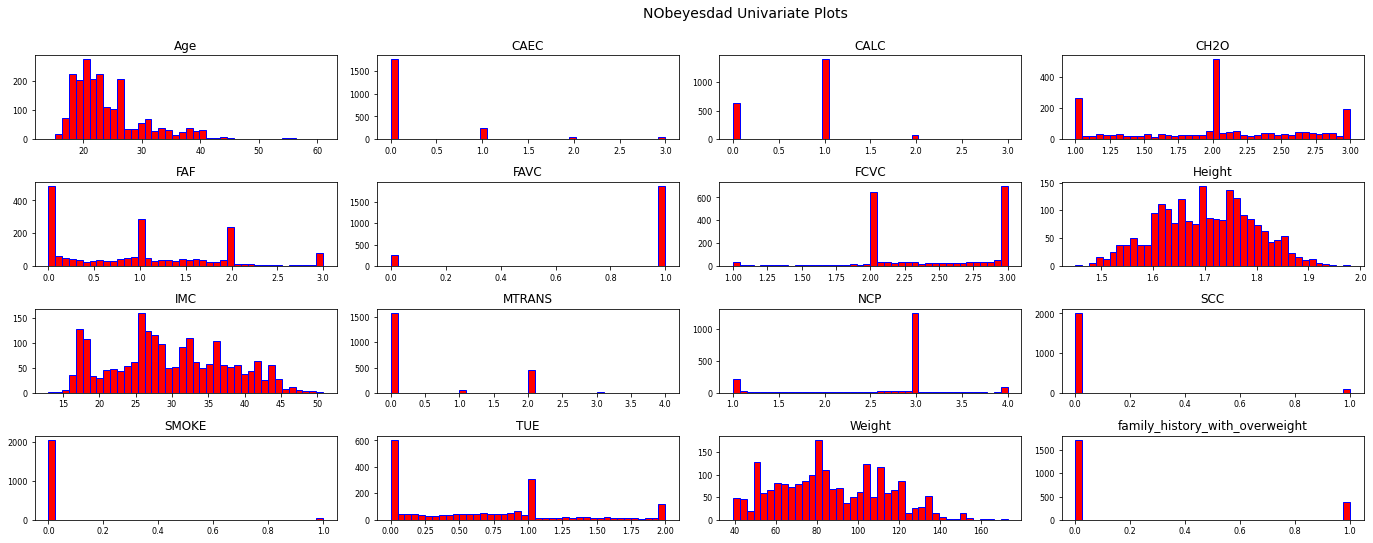

In [20]:
df_copy[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('NObeyesdad Univariate Plots', x=0.65, y=1.25, fontsize=14)

Text(0.65, 1.25, 'Obesity Quality Plot')

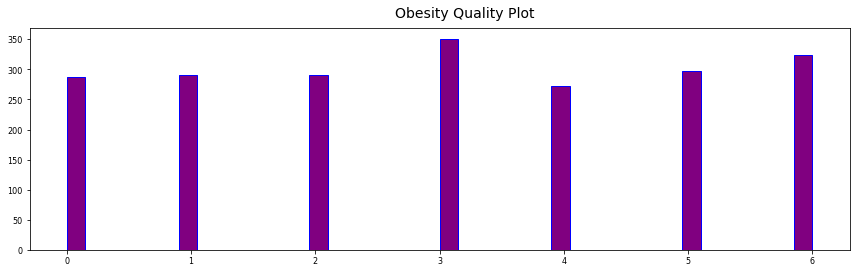

In [21]:
df_copy[target].hist(bins=40, edgecolor='b', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False, figsize=(10,3), color='purple')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Obesity Quality Plot', x=0.65, y=1.25, fontsize=14)

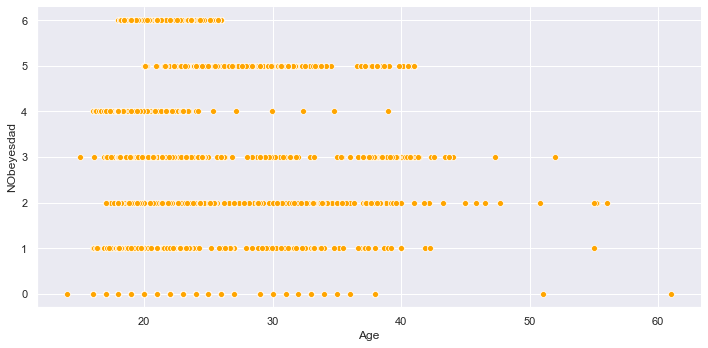

In [22]:
sns.set()
sns.relplot(data=df_copy, x='Age', y=target, kind='scatter', height=5, aspect=2, color='orange')

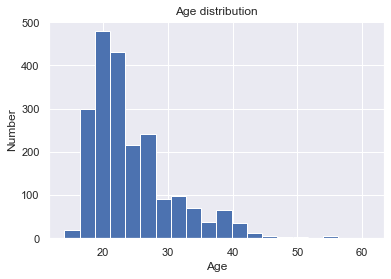

In [23]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df['Age'],bins = 20) 
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Number')
plt.color='orange'
plt.show()

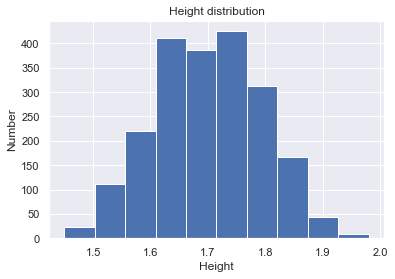

In [24]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df['Height'],bins = 10) 
plt.title('Height distribution')
plt.xlabel('Height')
plt.ylabel('Number')
plt.show()

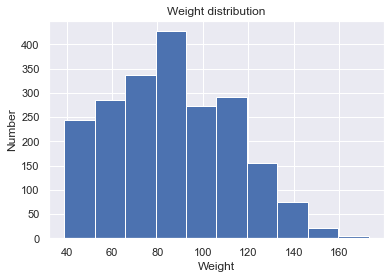

In [25]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df['Weight'],bins = 10) 
plt.title('Weight distribution')
plt.xlabel('Weight')
plt.ylabel('Number')
plt.show()

Text(0.5, 1.0, 'Count obesity')

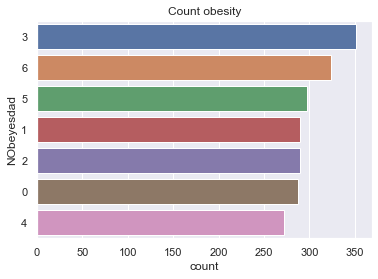

In [26]:
sns.countplot(y="NObeyesdad", data=df, order = df['NObeyesdad'].value_counts().index).set_title("Count obesity")

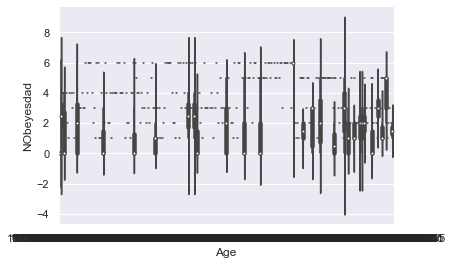

In [27]:
sns.violinplot(df['Age'], df['NObeyesdad']) #Variable Plot
sns.despine()


count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64


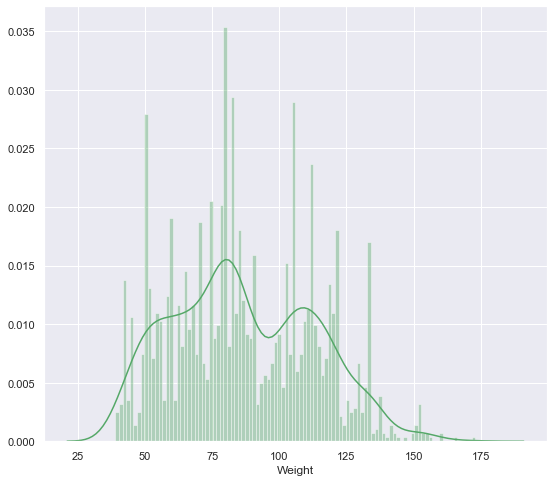

In [28]:
print(df['Weight'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Weight'], color='g', bins=100, hist_kws={'alpha': 0.4})

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

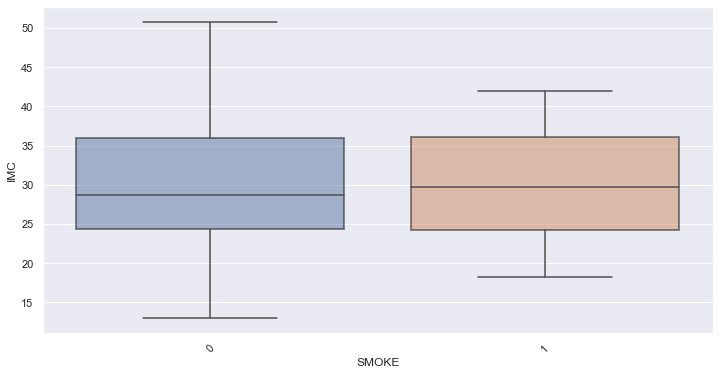

In [29]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='SMOKE', y='IMC', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

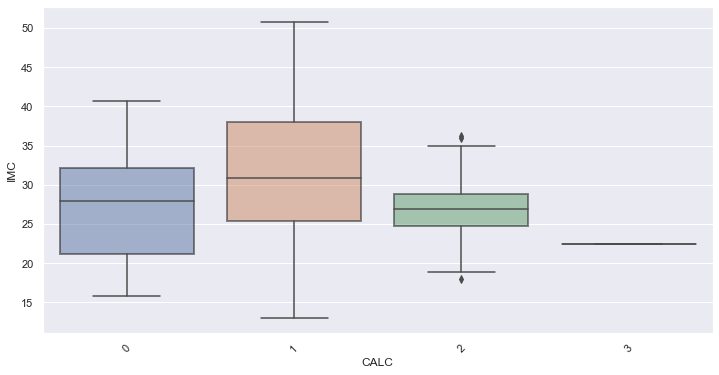

In [30]:
#Alcool
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='CALC', y='IMC', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

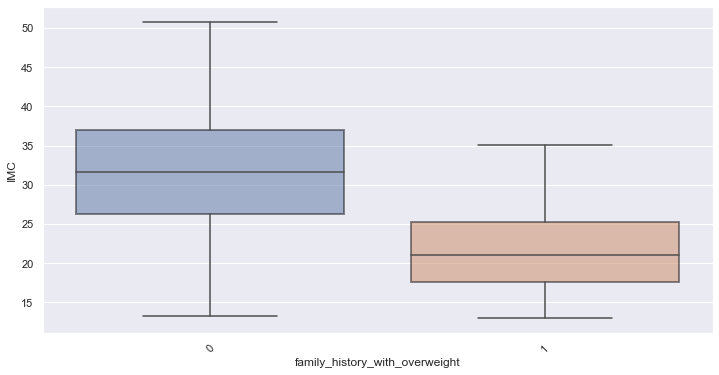

In [31]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='family_history_with_overweight', y='IMC', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

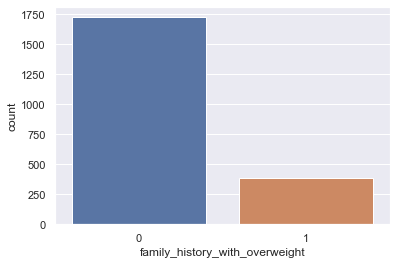

In [32]:
sns.countplot(df["family_history_with_overweight"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8FAF0B340>,
      dtype=object)

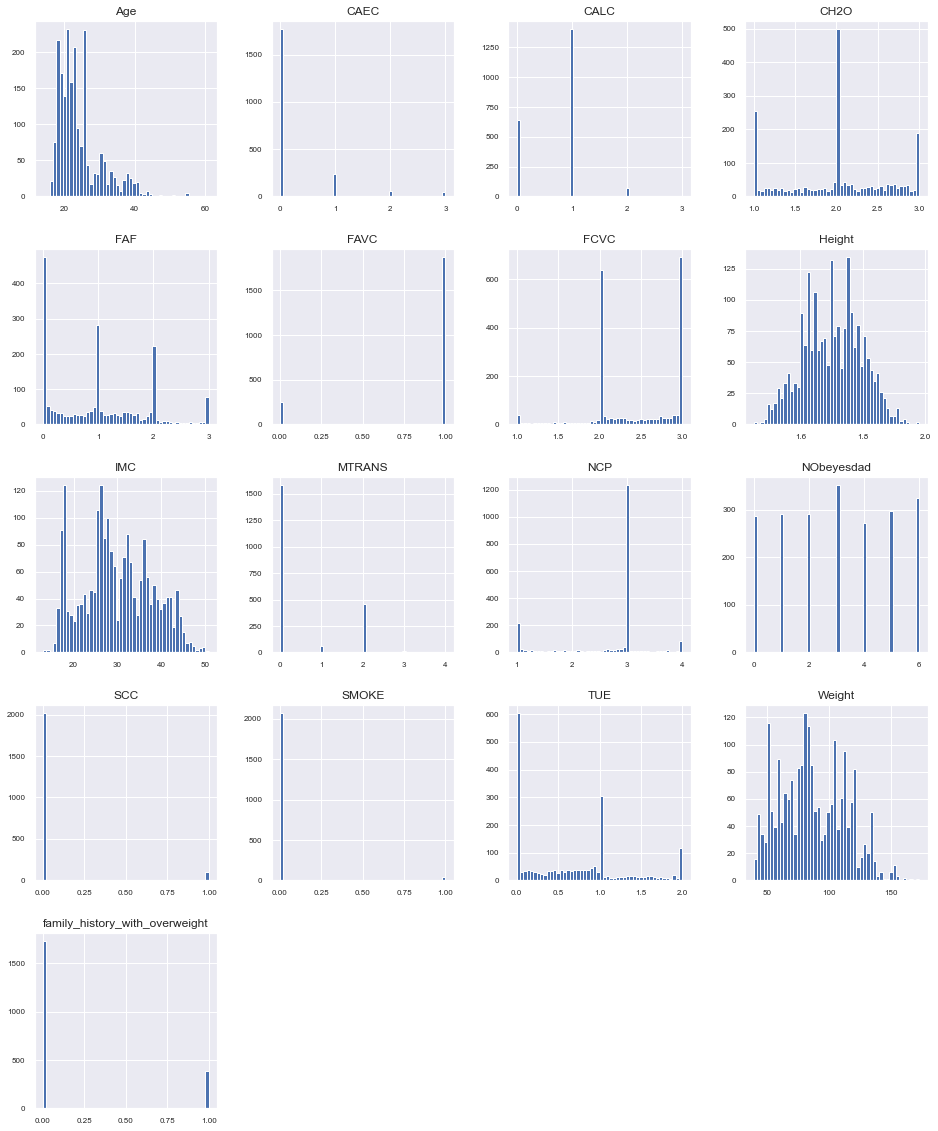

In [33]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### Prepocessing data

We split our datas in training and test data:

In [136]:
x,y = df.loc[:,df.columns != 'NObeyesdad'], df.loc[:,'NObeyesdad']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

Now we can scale our datas:


In [137]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

17
17


### Vizualisation

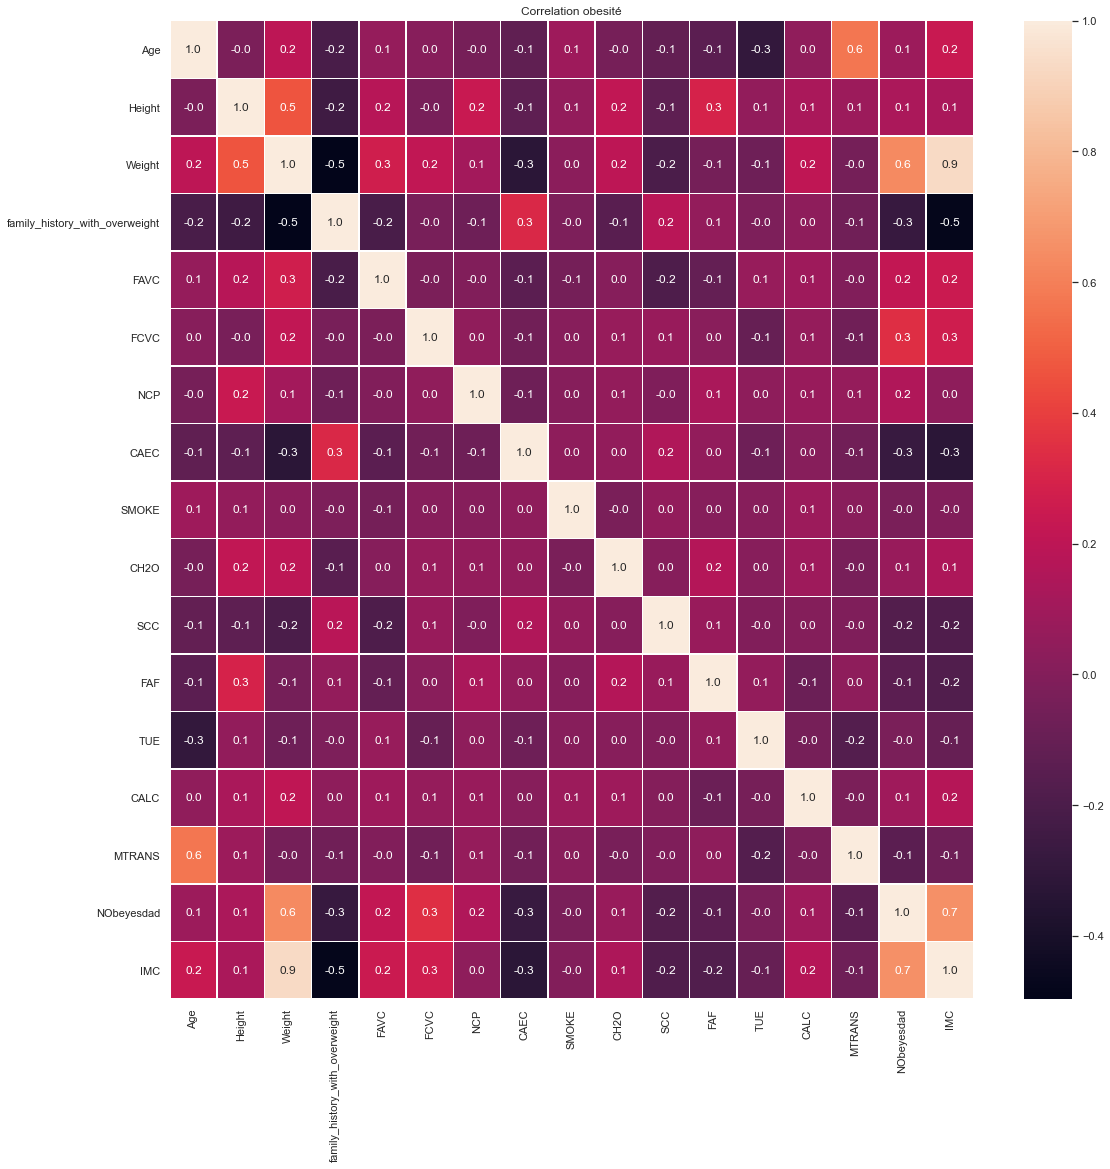

In [34]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax).set(title="Correlation obesité")
plt.show()

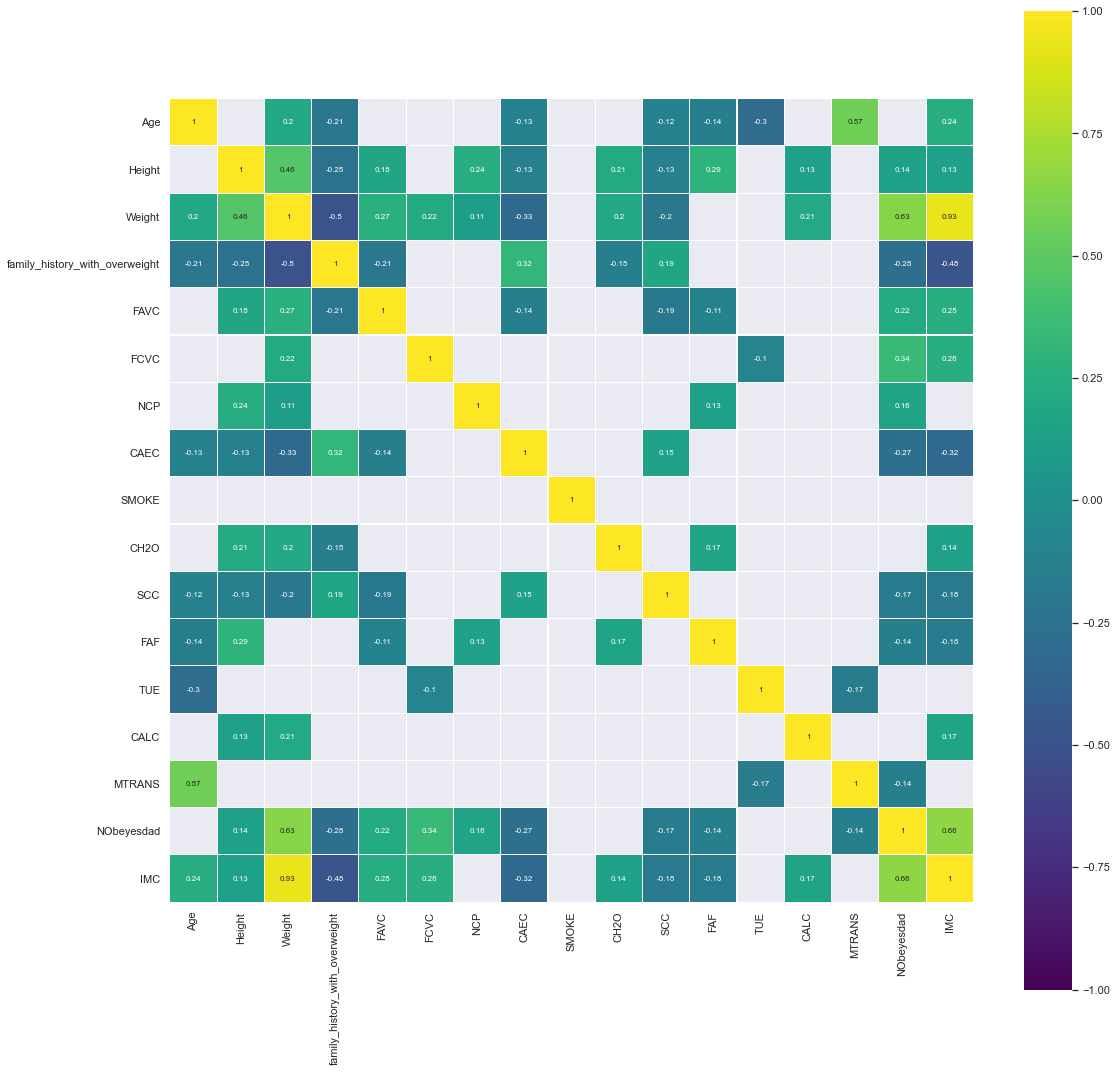

In [35]:
corr= df.corr()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, ax=ax,annot_kws={"size": 8}, square=True)

### 5. Machine Learning Models

#### Supervised

In [36]:
# Ici tente des trucs si tu le sens faut faire des modèles, en créant un training et test data 
# et choper la meilleure précisision un peu comme au hackaton 

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [111]:
scores = []
predictions_list = []

#### KNN

In [138]:
# train test split
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8690851735015773


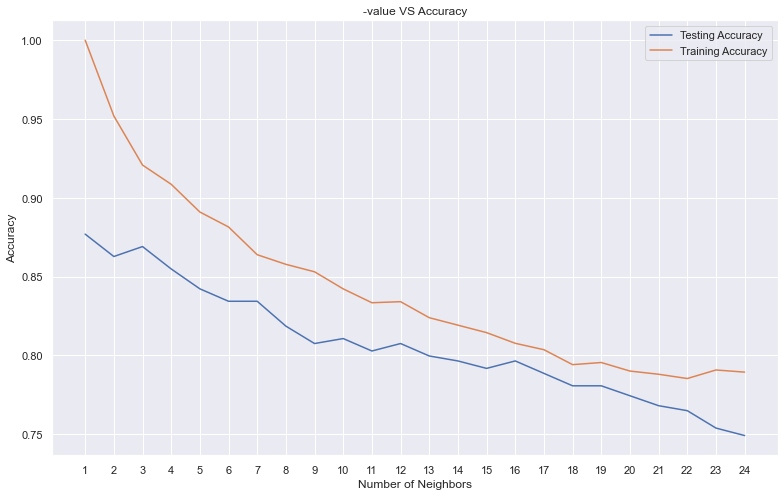

Best accuracy is 0.8769716088328076 with K = 1


In [139]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

#### About Confusion Matrix
    • tp = Prediction is positive(normal) and actual is positive(normal).
    • fp = Prediction is positive(normal) and actual is negative(abnormal).
    • fn = Prediction is negative(abnormal) and actual is positive(normal).
    • tn = Prediction is negative(abnormal) and actual is negative(abnormal)
    • precision = tp / (tp+fp)
    • recall = tp / (tp+fn)
    • f1 = 2 precision recall / ( precision + recall)

### Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression(max_iter= 2000, random_state=10)
logreg.fit(x_train,y_train)
y_pred= logreg.predict(x_test)
logreg.score(x_train,y_train)

0.9316181448882871

Confusion matrix: 
 [[52 14  1  0 10  0  0]
 [ 6 67 16  0  0  0  0]
 [ 0  8 72  5  0  0  0]
 [ 0  0  5 99  0  9  1]
 [ 2  0  0  0 90  0  0]
 [ 0  0  0  2  0 83  0]
 [ 0  0  0  1  0  0 91]]
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.68      0.76        77
           1       0.75      0.75      0.75        89
           2       0.77      0.85      0.80        85
           3       0.93      0.87      0.90       114
           4       0.90      0.98      0.94        92
           5       0.90      0.98      0.94        85
           6       0.99      0.99      0.99        92

    accuracy                           0.87       634
   macro avg       0.87      0.87      0.87       634
weighted avg       0.88      0.87      0.87       634

Accuracy Score : 0.8738170347003155


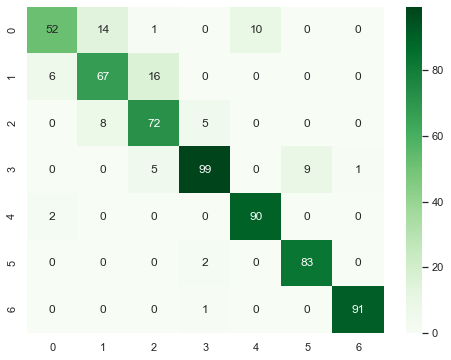

In [141]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
print('Accuracy Score : ' + str(accuracy_score(y_test, y_pred)))

# visualize with seaborn library
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens") 
plt.show()

### LDA

Confusion matrix: 
 [[ 72   0   5   0   0   0   0]
 [  9   0  80   0   0   0   0]
 [  0   0  82   3   0   0   0]
 [  0   0   1 109   0   4   0]
 [ 92   0   0   0   0   0   0]
 [  0   0   0   2   0  83   0]
 [  0   0   0   0   0   4  88]]
Classification report: 
               precision    recall  f1-score   support

           0       0.42      0.94      0.58        77
           1       0.00      0.00      0.00        89
           2       0.49      0.96      0.65        85
           3       0.96      0.96      0.96       114
           4       0.00      0.00      0.00        92
           5       0.91      0.98      0.94        85
           6       1.00      0.96      0.98        92

    accuracy                           0.68       634
   macro avg       0.54      0.68      0.59       634
weighted avg       0.56      0.68      0.60       634

Accuracy0.6845425867507886


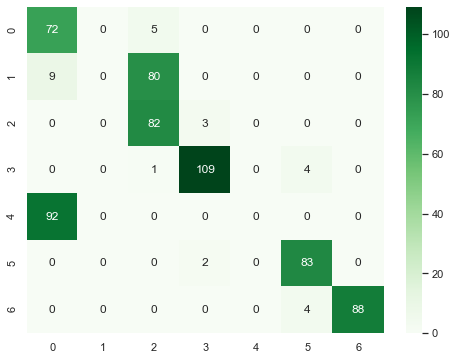

In [142]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)


classifier = RandomForestClassifier(max_depth=2, random_state=4)

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# visualize with seaborn library
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens") 
plt.show()

### Decision Tree Classifier

In [143]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)
y_pred_gini = clf_gini.predict(x_test)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred_gini))
print('Accuracy' + str(accuracy_score(y_test, y_pred_gini)))


Confusion matrix: 
 [[ 72   0   5   0   0   0   0]
 [  9   0  80   0   0   0   0]
 [  0   0  82   3   0   0   0]
 [  0   0   1 109   0   4   0]
 [ 92   0   0   0   0   0   0]
 [  0   0   0   2   0  83   0]
 [  0   0   0   0   0   4  88]]
Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86        77
           1       0.86      0.79      0.82        89
           2       0.89      0.88      0.89        85
           3       0.96      0.96      0.96       114
           4       0.98      0.93      0.96        92
           5       0.88      0.98      0.93        85
           6       1.00      0.92      0.96        92

    accuracy                           0.91       634
   macro avg       0.91      0.91      0.91       634
weighted avg       0.92      0.91      0.91       634

Accuracy0.9132492113564669


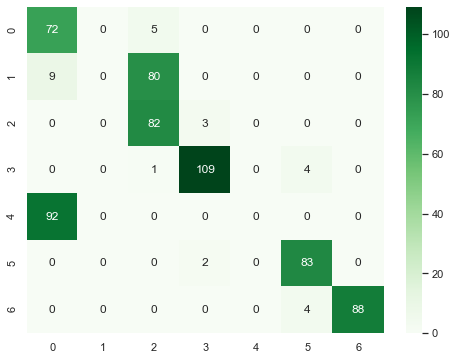

In [46]:
# visualize with seaborn library
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens") 
plt.show()

### Random Forest

Confusion matrix: 
 [[ 67   8   0   0   2   0   0]
 [  8  66  15   0   0   0   0]
 [  0   8  74   3   0   0   0]
 [  0   0   1 104   0   9   0]
 [  5   0   0   0  87   0   0]
 [  0   0   0   4   0  75   6]
 [  0   0   0   0   0   6  86]]
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.80      0.74      0.77        89
           2       0.82      0.87      0.85        85
           3       0.94      0.91      0.92       114
           4       0.98      0.95      0.96        92
           5       0.83      0.88      0.86        85
           6       0.93      0.93      0.93        92

    accuracy                           0.88       634
   macro avg       0.88      0.88      0.88       634
weighted avg       0.88      0.88      0.88       634

Accuracy0.8817034700315457


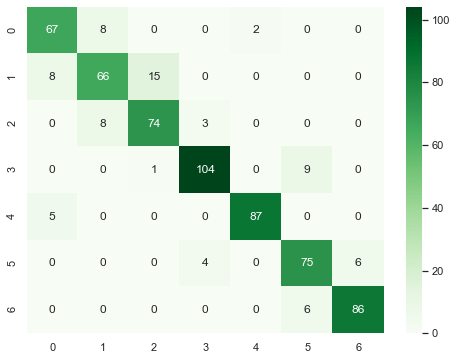

In [144]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=50)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# visualize with seaborn library
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens") 
plt.show()

### Bagging

Confusion matrix: 
 [[ 65   8   0   0   4   0   0]
 [  8  68  13   0   0   0   0]
 [  0   8  75   2   0   0   0]
 [  0   0   1 104   0   9   0]
 [  5   0   0   0  87   0   0]
 [  0   0   0   4   0  77   4]
 [  0   0   0   0   0   6  86]]
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84        77
           1       0.81      0.76      0.79        89
           2       0.84      0.88      0.86        85
           3       0.95      0.91      0.93       114
           4       0.96      0.95      0.95        92
           5       0.84      0.91      0.87        85
           6       0.96      0.93      0.95        92

    accuracy                           0.89       634
   macro avg       0.88      0.88      0.88       634
weighted avg       0.89      0.89      0.89       634

Accuracy0.886435331230284


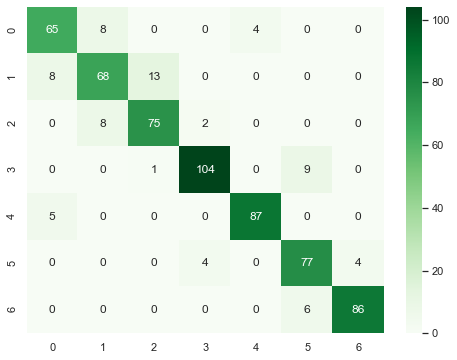

In [147]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(random_state=50)
bagging.fit(x_train, y_train)

y_pred = bagging.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# visualize with seaborn library
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens") 
plt.show()

### Boosting

Confusion matrix: 
 [[ 71   4   0   0   2   0   0]
 [ 11  70   8   0   0   0   0]
 [  0   7  76   2   0   0   0]
 [  0   0   2 108   0   4   0]
 [  5   0   0   0  87   0   0]
 [  0   0   0   2   0  83   0]
 [  0   0   0   0   0   4  88]]
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87        77
           1       0.86      0.79      0.82        89
           2       0.88      0.89      0.89        85
           3       0.96      0.95      0.96       114
           4       0.98      0.95      0.96        92
           5       0.91      0.98      0.94        85
           6       1.00      0.96      0.98        92

    accuracy                           0.92       634
   macro avg       0.92      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634

Accuracy0.919558359621451


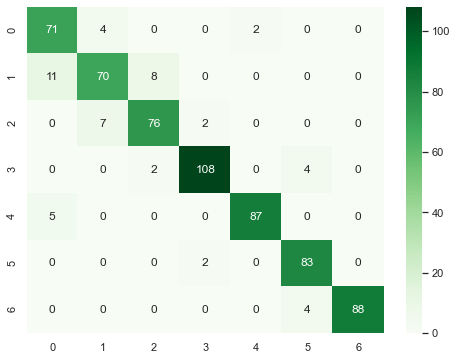

In [148]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

boost = HistGradientBoostingClassifier(random_state=50)
boost.fit(x_train, y_train)

y_pred = boost.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# visualize with seaborn library
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens") 
plt.show()

In [118]:
algoritms = ["Logistic Regression" ,"LDA", "Decision Tree Classifier", "Random Forest","Bagging", "Boosting" ]


#scores.append(knn.score(x_train,y_train))
scores.append(logreg.score(x_train,y_train))
scores.append(lda.score(x_train,y_train))
scores.append(clf_gini.score(x_train,y_train))
scores.append(RF.score(x_train,y_train))
scores.append(boost.score(x_train,y_train))
scores.append(bagging.score(x_train,y_train))

#predictions_KNN = knn.predict(x_test)
#predictions_list.append(accuracy_score(y_test, predictions_KNN))
predictions_LR = logreg.predict(x_test)
predictions_list.append(accuracy_score(y_test, predictions_LR))
predictions_LDA = lda.predict(x_test)
predictions_list.append(accuracy_score(y_test, predictions_LDA))
predictions_CLTREE = clf_gini.predict(x_test)
predictions_list.append(accuracy_score(y_test, predictions_CLTREE))
predictions_RF = RF.predict(x_test)
predictions_list.append(accuracy_score(y_test, predictions_RF))
predictions_BOOSTING = boost.predict(x_test)
predictions_list.append(accuracy_score(y_test, predictions_BOOSTING))
predictions_BAGGING = bagging.predict(x_test)
predictions_list.append(accuracy_score(y_test, predictions_BAGGING))


import plotly as py
import plotly.graph_objs as go

layout = {
    'title' : 'Percentage Of Success Of Algorithms And Test Result',
    'xaxis' : {
        'title' : 'Algoritms',
    },
    'yaxis' : {
        'title' : '%',
    },
}

trace1 = go.Bar(
    name = 'Train Set',
    x = algoritms,
    y = scores,
    marker = dict(
      color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=2,
        )  
    ),
)

trace2 = go.Bar(
    name = 'Test Set',
    x = algoritms,
    y = predictions_list,
    marker = dict(
      color='rgb(58,200,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=2,
        )  
    ),
)

fig = go.Figure(data = [trace1, trace2], layout = layout)
py.offline.iplot(fig)


ValueError: X has 1 features per sample; expecting 17

### Features selection

The best algorithm is Random Forest for our data, so we can eleminate noise features:

In [150]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

print(len(x_train[0]))
x_new = SelectKBest(chi2, k=3).fit(x_train, y_train)
cols = x_new.get_support(indices=True)
features_new = df.iloc[:,cols]
print(features_new)

1


ValueError: k should be >=0, <= n_features = 1; got 3. Use k='all' to return all features.

### Model exportation

In [189]:
import pickle
pickle.dump(boost, open('model.pkl', 'wb'))

